In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load datasets
aus_men = pd.read_csv('/content/drive/MyDrive/DatasetforDA/tennis+major+tournament+match+statistics/AusOpen-men-2013.csv')
aus_women = pd.read_csv('/content/drive/MyDrive/DatasetforDA/tennis+major+tournament+match+statistics/AusOpen-women-2013.csv')
french_men = pd.read_csv('/content/drive/MyDrive/DatasetforDA/tennis+major+tournament+match+statistics/FrenchOpen-men-2013.csv')
french_women = pd.read_csv('/content/drive/MyDrive/DatasetforDA/tennis+major+tournament+match+statistics/FrenchOpen-women-2013.csv')
us_men = pd.read_csv('/content/drive/MyDrive/DatasetforDA/tennis+major+tournament+match+statistics/USOpen-men-2013.csv')
us_women = pd.read_csv('/content/drive/MyDrive/DatasetforDA/tennis+major+tournament+match+statistics/USOpen-women-2013.csv')
wimbledon_men = pd.read_csv('/content/drive/MyDrive/DatasetforDA/tennis+major+tournament+match+statistics/Wimbledon-men-2013.csv')
wimbledon_women = pd.read_csv('/content/drive/MyDrive/DatasetforDA/tennis+major+tournament+match+statistics/Wimbledon-women-2013.csv')

# Concatenate all datasets into one dataframe
data = pd.concat([aus_men, aus_women, french_men, french_women, us_men, us_women, wimbledon_men, wimbledon_women], ignore_index=True)

# Check first few rows of the data and the column names
data.head(), data.columns


(            Player1          Player2  Round  Result  FNL1  FNL2  FSP.1  FSW.1  \
 0       Lukas Lacko   Novak Djokovic    1.0       0   0.0   3.0     61     35   
 1    Leonardo Mayer  Albert Montanes    1.0       1   3.0   0.0     61     31   
 2  Marcos Baghdatis    Denis Istomin    1.0       0   0.0   3.0     52     53   
 3   Dmitry Tursunov  Michael Russell    1.0       1   3.0   0.0     53     39   
 4       Juan Monaco   Ernests Gulbis    1.0       0   1.0   3.0     76     63   
 
    SSP.1  SSW.1  ...  ST3.2  ST4.2  ST5.2  FNL.1  FNL.2  Player 1  Player 2  \
 0     39     18  ...    6.0    NaN    NaN    NaN    NaN       NaN       NaN   
 1     39     13  ...    1.0    NaN    NaN    NaN    NaN       NaN       NaN   
 2     48     20  ...    6.0    NaN    NaN    NaN    NaN       NaN       NaN   
 3     47     24  ...    3.0    NaN    NaN    NaN    NaN       NaN       NaN   
 4     24     12  ...    7.0    6.0    NaN    NaN    NaN       NaN       NaN   
 
    ROUND  ST2.1.1  ST1.

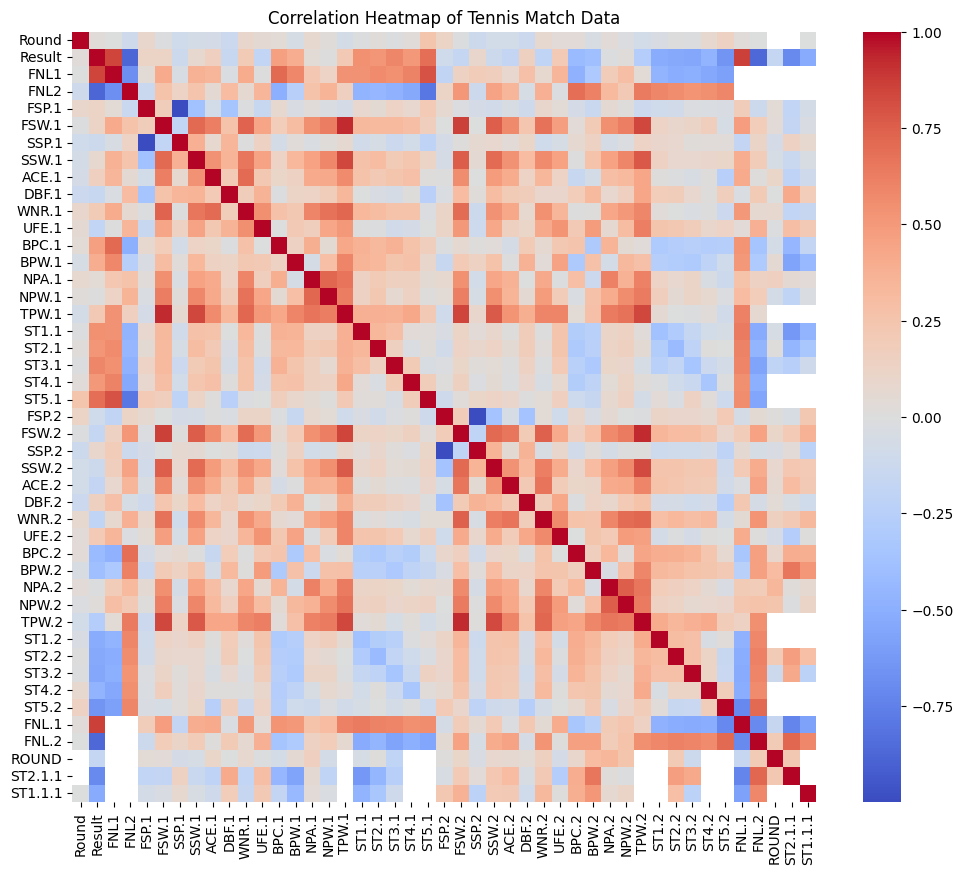

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data here
# data = pd.read_csv('your_data.csv')

# Convert 'Result' into an integer type for correlation, if it's not already
data['Result'] = data['Result'].astype(int)

# Select only numeric columns for the correlation calculation
numeric_data = data.select_dtypes(include=[int, float])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Create a heatmap of these correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Tennis Match Data')
plt.show()


In [5]:
# Select only numeric columns for correlation calculation to avoid errors
numeric_data = data.select_dtypes(include=[int, float])

# Calculate correlation matrix for numeric columns only
correlation_matrix = numeric_data.corr()

# Compute the absolute correlations with the 'Result' column
absolute_correlations = correlation_matrix['Result'].abs().sort_values(ascending=False)

# Identify the top 5 features most correlated with the 'Result', excluding the 'Result' itself
top_5_correlations = absolute_correlations.drop(labels=['Result']).head(5)
top_5_correlations


FNL2       0.877629
FNL.2      0.872052
FNL.1      0.861443
FNL1       0.844797
ST2.1.1    0.706504
Name: Result, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

In [12]:
X = numeric_data.drop('Result', axis=1)
y = numeric_data['Result']

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the data into training and test sets (90% training, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.10, random_state=42)



In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Parameters for grid-search
param_grid = {
    'knn__n_neighbors': np.arange(1, 31)  # testing k values from 1 to 30
}


In [14]:
# Performing grid search with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=10, verbose=1)
grid_search.fit(X_train, y_train)

# Extracting the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Parameters: {'knn__n_neighbors': 16}
Best Score: 0.9752661064425769


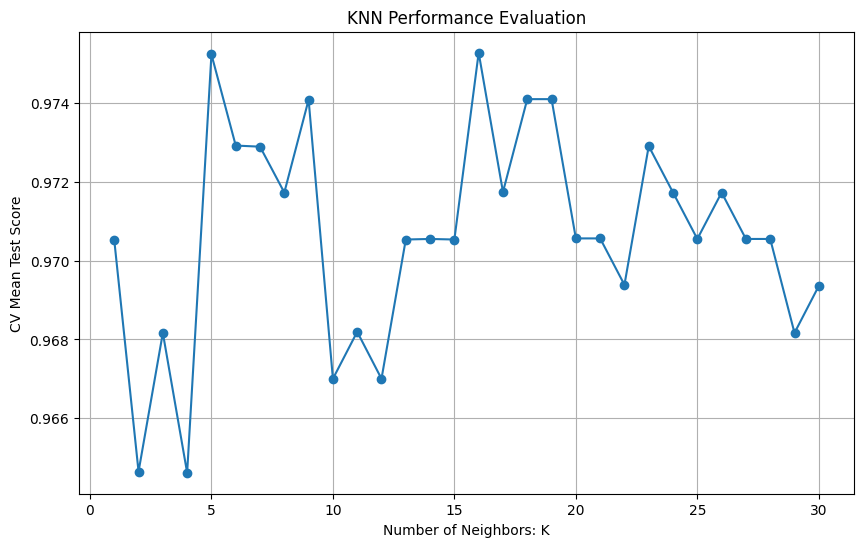

Best Parameters: {'knn__n_neighbors': 16}
Best Score: 0.9752661064425769


In [19]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = np.arange(1, 31)

# Plotting the mean test scores per K value
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('CV Mean Test Score')
plt.title('KNN Performance Evaluation')
plt.grid(True)
plt.show()

print("Best Parameters:", best_params)
print("Best Score:", best_score)


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Use the best model from the grid search to predict on the test set
y_pred = grid_search.predict(X_test)

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        49

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



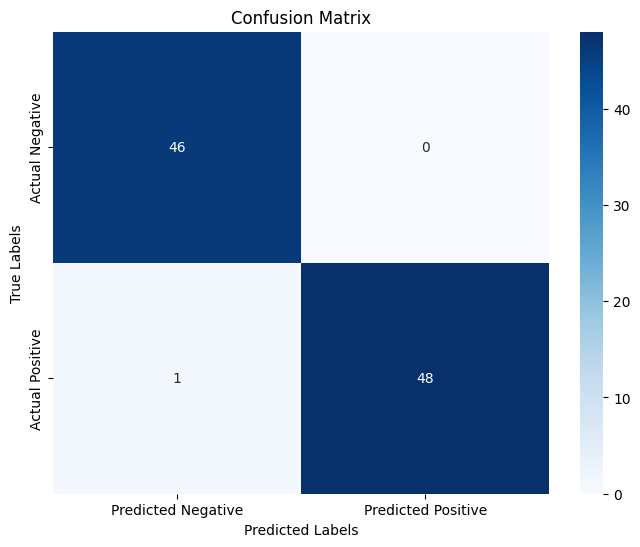

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()